# Question - 1

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [36]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 1. Bagging

In [38]:
categorical_val = []
continous_val = []
for column in df.columns:
#     print('==============================')
#     print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [40]:
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

Pregnancies ==> Missing zeros : 111
Glucose ==> Missing zeros : 5
BloodPressure ==> Missing zeros : 35
SkinThickness ==> Missing zeros : 227
Insulin ==> Missing zeros : 374
BMI ==> Missing zeros : 11
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


In [41]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)

df[feature_columns] = fill_values.fit_transform(df[feature_columns])

In [42]:
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

Pregnancies ==> Missing zeros : 0
Glucose ==> Missing zeros : 0
BloodPressure ==> Missing zeros : 0
SkinThickness ==> Missing zeros : 0
Insulin ==> Missing zeros : 0
BMI ==> Missing zeros : 0
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


In [43]:
from sklearn.model_selection import train_test_split


X = df[feature_columns]
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [45]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    349.0  188.0       1.0      537.0         537.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[119  32]
 [ 24  56]]
ACCURACY SCORE:
0.7576
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.832168   0.636364  0.757576    0.734266      0.764357
recall       0.788079   0.700000  0.757576    0.744040      0.757576
f1-score     0.809524   0.666667  0.757576    0.738095      0.760049
support    151.000000  80.000000  0.757576  231.000000    231.000000


In [46]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}

# 2. Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    349.0  188.0       1.0      537.0         537.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[123  28]
 [ 29  51]]
ACCURACY SCORE:
0.7532
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.809211   0.645570  0.753247    0.727390      0.752538
recall       0.814570   0.637500  0.753247    0.726035      0.753247
f1-score     0.811881   0.641509  0.753247    0.726695      0.752878
support    151.000000  80.000000  0.753247  231.000000    231.000000


In [48]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }

# 3.Boosting

In [54]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[310  39]
 [ 51 137]]
ACCURACY SCORE:
0.8324
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.858726    0.778409  0.832402    0.818567      0.830607
recall       0.888252    0.728723  0.832402    0.808488      0.832402
f1-score     0.873239    0.752747  0.832402    0.812993      0.831056
support    349.000000  188.000000  0.832402  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[123  28]
 [ 27  53]]
ACCURACY SCORE:
0.7619
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.820000   0.654321  0.761905    0.737160      0.762622
recall       0.814570   0.662500  0.761905    0.738535      0.761905
f1-score     0.817276   0.658385  0.761905    0.737830      0.762249
support    151.000000  80.000000  0.761905  231.000000    231.000000


In [50]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

# 4. Logistic regression 

In [51]:
from sklearn.model_selection import learning_curve

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score, precision_score, accuracy_score, plot_confusion_matrix, classification_report, f1_score

In [53]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(random_state=42)
log_clf.fit(X_train, y_train)
evaluate(log_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[310  39]
 [ 78 110]]
ACCURACY SCORE:
0.7821
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.798969    0.738255  0.782123    0.768612      0.777714
recall       0.888252    0.585106  0.782123    0.736679      0.782123
f1-score     0.841248    0.652819  0.782123    0.747034      0.775280
support    349.000000  188.000000  0.782123  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[122  29]
 [ 32  48]]
ACCURACY SCORE:
0.7359
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.792208   0.623377  0.735931    0.707792      0.733738
recall       0.807947   0.600000  0.735931    0.703974      0.735931
f1-score     0.800000   0.611465  0.735931    0.705732      0.734706
support    151.000000  80.000000  0.735931  231.000000    231.000000


C:\Users\124ab\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
scores['Logisticregression'] = {
        'Train': accuracy_score(y_train, log_clf.predict(X_train)),
        'Test': accuracy_score(y_test, log_clf.predict(X_test)),
    }

# 5. SVM

In [56]:
from sklearn import svm


In [58]:
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)
evaluate(svm_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[319  30]
 [ 95  93]]
ACCURACY SCORE:
0.7672
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.770531    0.756098  0.767225    0.763314      0.765478
recall       0.914040    0.494681  0.767225    0.704360      0.767225
f1-score     0.836173    0.598071  0.767225    0.717122      0.752815
support    349.000000  188.000000  0.767225  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[130  21]
 [ 41  39]]
ACCURACY SCORE:
0.7316
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.760234   0.650000  0.731602    0.705117      0.722058
recall       0.860927   0.487500  0.731602    0.674214      0.731602
f1-score     0.807453   0.557143  0.731602    0.682298      0.720766
support    151.000000  80.000000  0.731602  231.000000    231.000000


In [59]:
scores['SVM'] = {
        'Train': accuracy_score(y_train, svm_clf.predict(X_train)),
        'Test': accuracy_score(y_test, svm_clf.predict(X_test)),
    }

<AxesSubplot:>

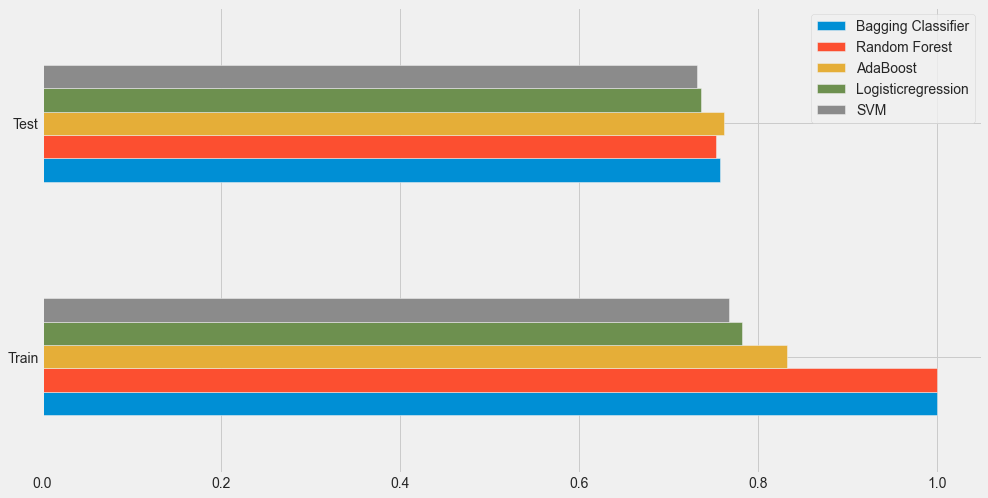

In [60]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))

# Question - 2

In [61]:
# 1.1 Call Libraries and import Dataset.
%reset -f
import numpy as np
import pandas as pd
from pandas.io.parsers import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
import matplotlib as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE

#2.0 Import OS directory and import data from CSV file
import os          
carvan = read_csv('caravan-insurance-challenge.csv')


In [62]:
carvan['CARAVAN'].value_counts()

0    9236
1     586
Name: CARAVAN, dtype: int64

In [63]:
#2.2 Divide the Data into Training and Testing Data. 
#After division Carvan_train is my training dataset and Carvan_test is my testing dataset.
carvan_train = carvan.loc[carvan['ORIGIN'] == 'train']
carvan_train = carvan_train.drop(['ORIGIN'],axis =1)
carvan_test = carvan.loc[carvan['ORIGIN'] == 'test']
carvan_test = carvan_test.drop(['ORIGIN'],axis =1)

#2.3 Divide the carvan_train and carvan_test data into X_train,y_train,X_test and y_test

y_train = carvan_train.pop("CARAVAN")
X_train = carvan_train
y_test = carvan_test.pop("CARAVAN")
X_test = carvan_test

In [64]:
colunique=X_train.nunique
cols= (X_train.nunique() < 41 )
cols
cat_cols = cols[cols==True].index.tolist()
num_cols = cols[cols==False].index.tolist()
cat_cols
num_cols

[]

In [65]:
#2.5 First Doing decision Tree Classification we find the score of dataset.

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train,y_train)
y_predict_dt = dt.predict(X_test)
score_dt =np.sum(y_predict_dt ==y_test)/len(y_test)
score_dt

0.93225

In [23]:
!pip install --upgrade category_encoders

In [66]:
#2.6 Since All the Columns in this Dataset is of type Categorical having nunique values less than 50 
#we now use Target Encoder for better results.
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
ct = ColumnTransformer([('cde',TargetEncoder(),cat_cols)],remainder ="passthrough")


from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators =400,oob_score = True,bootstrap=True)    
#2.5 Define Pipeline
pipe_rf = Pipeline([('ct',ct),('rf',rf)])
pipe_rf.fit(X_train,y_train)
y_predict_rf = pipe_rf.predict(X_test)
score_rf =np.sum(y_predict_rf ==y_test)/len(y_test)
score_rf

C:\Users\124ab\Anaconda3\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\124ab\Anaconda3\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


0.933

In [67]:
#2.6 Evaluate the performance of model by Confusion Metrics and Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cf_rf =confusion_matrix(y_test,y_predict_rf)
cf_rf

array([[3718,   44],
       [ 224,   14]], dtype=int64)

In [68]:
cr_rf = classification_report(y_test,y_predict_rf)
cr_rf

'              precision    recall  f1-score   support\n\n           0       0.94      0.99      0.97      3762\n           1       0.24      0.06      0.09       238\n\n    accuracy                           0.93      4000\n   macro avg       0.59      0.52      0.53      4000\nweighted avg       0.90      0.93      0.91      4000\n'

In [69]:
#3.0 Evaluating the Dataset Using Adaboost Classifier Model

#3.1 Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
#Import AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
ct = ColumnTransformer([('cde',TargetEncoder(),cat_cols)],remainder ="passthrough")

#Instantiate Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth =1,random_state =1) 

#Instantiate AdaBoost Classifier
ada = AdaBoostClassifier(base_estimator =dt,n_estimators =100,random_state = 1)

#3.1 Define Pipeline
pipe_ada = Pipeline([('ct',ct),('ada',ada)])
pipe_ada.fit(X_train,y_train)
y_predict_ada = pipe_ada.predict(X_test)
score_ada =np.sum(y_predict_ada ==y_test)/len(y_test)
score_ada


C:\Users\124ab\Anaconda3\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\124ab\Anaconda3\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


0.93825

In [70]:
#4.0 Evaluating the Dataset Using Gradiant Boosting Model

#Import and Instantiate Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators = 100,max_depth = 1, random_state =2)
pipe_gb = Pipeline([('ct',ct),('gb',gb)])
pipe_gb.fit(X_train,y_train)
y_predict_gb = pipe_gb.predict(X_test)
score_gb =np.sum(y_predict_gb ==y_test)/len(y_test)
score_gb

C:\Users\124ab\Anaconda3\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\124ab\Anaconda3\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


0.94075

In [71]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score


classifiers = [
    LogisticRegression(max_iter = 1000,random_state = 48),
    KNeighborsClassifier(3),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),]

# Logging for Visual Comparison
log_cols=["Classifier", "F-score", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    test_predictions = clf.predict(X_test)
    acc = f1_score(y_test, test_predictions)
    print("F-score: {:.4%}".format(acc))
    
    test_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, test_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

C:\Users\124ab\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
****Results****
F-score: 2.4390%
Log Loss: 0.20698444697055537
KNeighborsClassifier
****Results****
F-score: 9.7720%
Log Loss: 1.5387980427763202
AdaBoostClassifier
****Results****
F-score: 3.1621%
Log Loss: 0.6526388876716189
GradientBoostingClassifier
****Results****
F-score: 3.9526%
Log Loss: 0.20906997866267568


In [73]:
import matplotlib.pyplot as plt

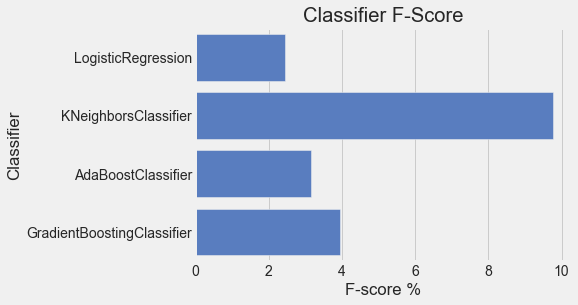

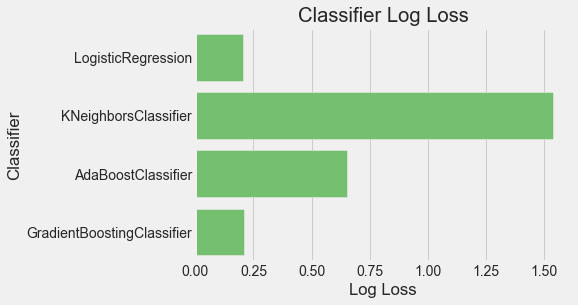

In [74]:
# F-Score & Log Loss Visualization

sns.set_color_codes("muted")
sns.barplot(x='F-score', y='Classifier', data=log, color="b")

plt.xlabel('F-score %')
plt.title('Classifier F-Score')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [75]:
test_target = y_test.copy()
test_target.reset_index(drop=True, inplace=True)
test_target=test_target.replace({
    1:'Yes',
    0:'No'
})
predicted_target=rf.predict(X_test)
predicted_target=pd.Series(predicted_target).replace({
    1:'Yes',
    0:'No'
})

C:\Users\124ab\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# Question - 3

In [79]:
# data manuipulation
import numpy as np
import pandas as pd

# modeling utilities
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split


# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting parameters tuning
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

In [80]:
hour_df = pd.read_csv("hour.csv")
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [81]:
# Renaming columns names to more readable names
hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

###########################
# Setting proper data types
###########################
# date time conversion
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

# categorical variables
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

In [83]:
# Defining categorical variables encoder method
def fit_transform_ohe(df,col_name):
    """This function performs one hot encoding for the specified
column.
    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        col_name: the column to be one hot encoded
    Returns:
        tuple: label_encoder, one_hot_encoder, transformed column as pandas Series
    """
    # label encode the column
    le = preprocessing.LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name+'_label'] = le_labels
    # one hot encoding
    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    return le,ohe,features_df

# given label encoder and one hot encoder objects, 
# encode attribute to ohe
def transform_ohe(df,le,ohe,col_name):
    # label encode
    col_labels = le.transform(df[col_name])
    df[col_name+'_label'] = col_labels
    
    # ohe 
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return features_df

In [84]:
# Divide the dataset into training and testing sets
X, X_test, y, y_test = train_test_split(hour_df.iloc[:,0:-3],
                                        hour_df.iloc[:,-1],
                                        test_size=0.33,
                                        random_state=42)
X.reset_index(inplace=True)
y = y.reset_index()

X_test.reset_index(inplace=True)
y_test = y_test.reset_index()

In [85]:
# Encoding all the categorical features
cat_attr_list = ['season','is_holiday',
                 'weather_condition','is_workingday',
                 'hour','weekday','month','year']
# though we have transformed all categoricals into their one-hot encodings, note that ordinal
# attributes such as hour, weekday, and so on do not require such encoding.
numeric_feature_cols = ['temp','humidity','windspeed',
                        'hour','weekday','month','year']
subset_cat_features =  ['season','is_holiday','weather_condition','is_workingday']

###############
# Train dataset
###############
encoded_attr_list = []
for col in cat_attr_list:
    return_obj = fit_transform_ohe(X,col)
    encoded_attr_list.append({'label_enc':return_obj[0],
                              'ohe_enc':return_obj[1],
                              'feature_df':return_obj[2],
                              'col_name':col})


feature_df_list  = [X[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df'] \
                        for enc in encoded_attr_list \
                        if enc['col_name'] in subset_cat_features])

train_df_new = pd.concat(feature_df_list, axis=1)
print("Train dataset shape::{}".format(train_df_new.shape))
print(train_df_new.head())

##############
# Test dataset
##############
test_encoded_attr_list = []
for enc in encoded_attr_list:
    col_name = enc['col_name']
    le = enc['label_enc']
    ohe = enc['ohe_enc']
    test_encoded_attr_list.append({'feature_df':transform_ohe(X_test,
                                                              le,ohe,
                                                              col_name),
                                   'col_name':col_name})
    
    
test_feature_df_list = [X_test[numeric_feature_cols]]
test_feature_df_list.extend([enc['feature_df'] \
                             for enc in test_encoded_attr_list \
                             if enc['col_name'] in subset_cat_features])

test_df_new = pd.concat(test_feature_df_list, axis=1) 
print("Test dataset shape::{}".format(test_df_new.shape))
print(test_df_new.head())

Train dataset shape::(11643, 19)
   temp  humidity  windspeed hour weekday month year  season_1  season_2  \
0  0.64      0.65     0.1940    0       5     9    0       0.0       0.0   
1  0.50      0.45     0.2239   13       2     3    0       0.0       1.0   
2  0.86      0.47     0.5224   12       0     8    1       0.0       0.0   
3  0.30      0.61     0.0000    2       3     2    1       1.0       0.0   
4  0.54      0.19     0.4179   17       6     4    1       0.0       1.0   

   season_3  season_4  is_holiday_0  is_holiday_1  weather_condition_1  \
0       1.0       0.0           1.0           0.0                  1.0   
1       0.0       0.0           1.0           0.0                  1.0   
2       1.0       0.0           1.0           0.0                  1.0   
3       0.0       0.0           1.0           0.0                  1.0   
4       0.0       0.0           1.0           0.0                  1.0   

   weather_condition_2  weather_condition_3  weather_condition_4 

In [86]:
# Constructing train dataset
X = train_df_new
y= y.total_count.values.reshape(-1,1)

# Constructing test dataset
X_test = test_df_new
y_test = y_test.total_count.values.reshape(-1,1)
print(X.shape,y.shape)

(11643, 19) (11643, 1)


In [87]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X,y)
print("R-Squared on train dataset={}".format(dtm.score(X_test,y_test)))

dtm.fit(X_test,y_test)   
print("R-Squaredon test dataset={}".format(dtm.score(X_test,y_test)))

R-Squared on train dataset=0.5617444790362427
R-Squaredon test dataset=0.5668794949265306


# Pruning 

In [99]:
param_grid = {
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X,y)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5),
             param_grid={'max_depth': [2, 6, 8], 'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [100]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.8320445160718
Best Hyperparameters::
{'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [103]:
df = pd.DataFrame(data=grid_cv_dtm.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012203,0.010322,0.002659,0.000788,2,5,20,10,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,55
1,0.007820,0.001174,0.002389,0.000775,2,5,20,20,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,55
2,0.007219,0.000390,0.001404,0.000486,2,5,20,40,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,55
3,0.008147,0.000825,0.001806,0.000403,2,5,40,10,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,55
4,0.008402,0.002352,0.002026,0.000038,2,5,40,20,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,55


[Text(0.5, 1.0, 'Effect of Depth and Leaf Nodes on Model Performance')]

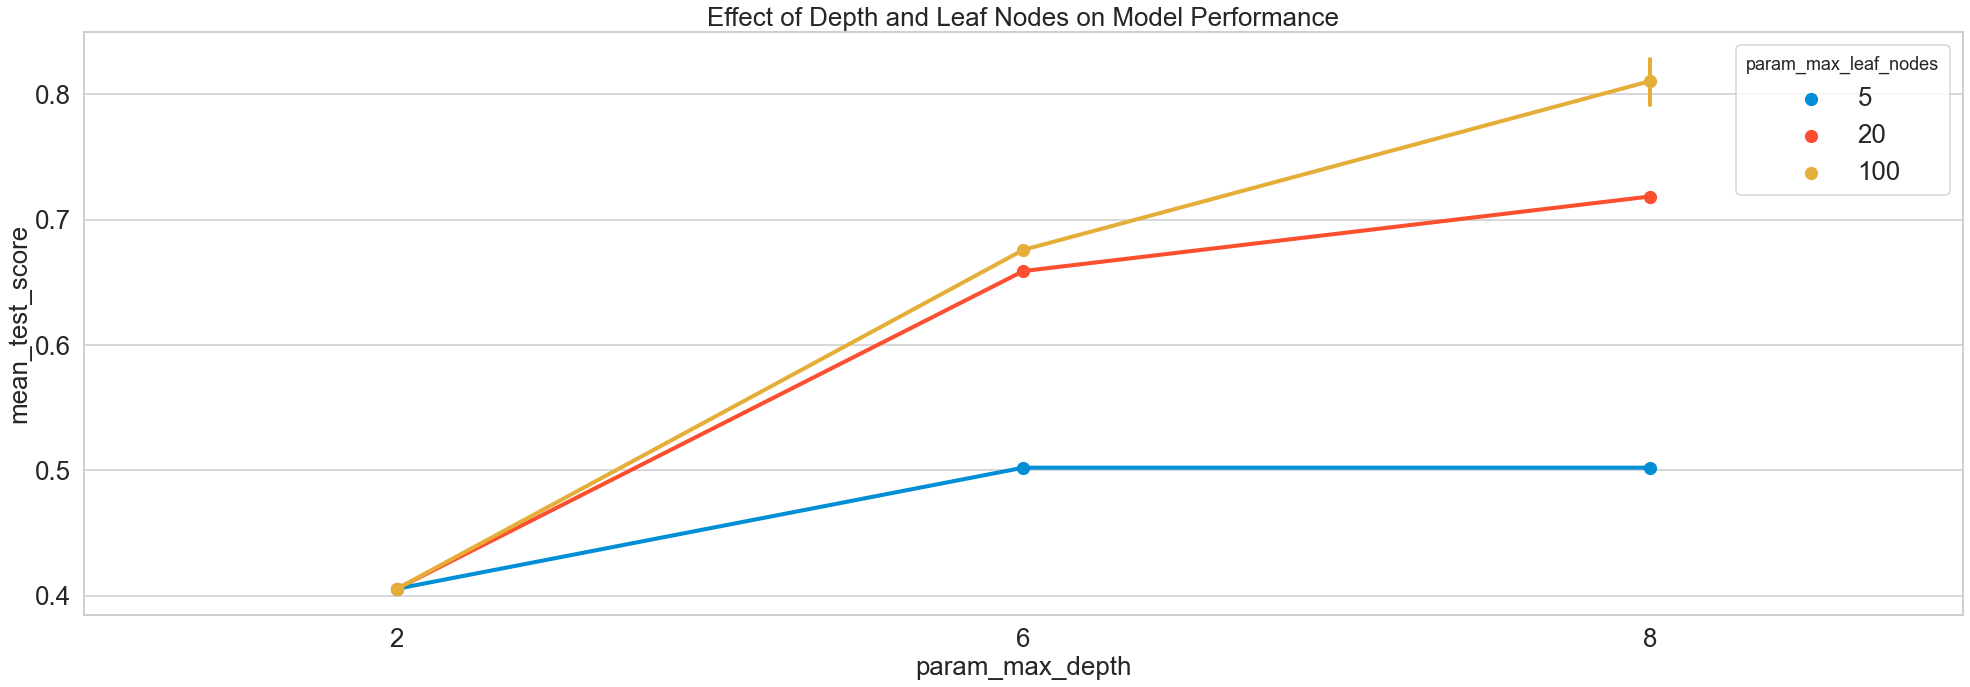

In [104]:
fig,ax = plt.subplots()
sns.pointplot(data=df[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")